In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [ ]:
df = pd.read_csv('https://gist.githubusercontent.com/stefanerben/8f166d2d285645ac50568eea9324ba05/raw/3cba3c0db042fab4d9c577c8e8c751cca5ee2d0f/comments-rating.csv')
df.head()

,number,scam,msg_length,msg
0,0,1,261,entrepreneurship isn’t easy just like protesti...
1,1,0,4,yup!
2,2,0,3,😂😂😂
3,3,1,366,$babyqj 0x800e9d435dcef7a5d43be2bbc5b5cb280fcd...
4,4,0,80,27 crore 😮😮😮😮 say whattt... you are inspiring ...


In [ ]:
# Split the data into training and testing sets
X = df['msg']
y = df['scam']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
%%time

# Create a CountVectorizer to convert text into numerical features
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Create and train the linear regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

CPU times: user 239 ms, sys: 2.18 ms, total: 241 ms
Wall time: 281 ms


In [ ]:
# Calculate evaluation metrics
accuracy = round(accuracy_score(y_test, y_pred), 6)
precision = round(precision_score(y_test, y_pred), 6)
recall = round(recall_score(y_test, y_pred), 6)
f1 = round(f1_score(y_test, y_pred), 6)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.916435
Precision: 0.9163
Recall: 0.835341
F1 Score: 0.87395
ROC AUC Score: 0.897414819191478


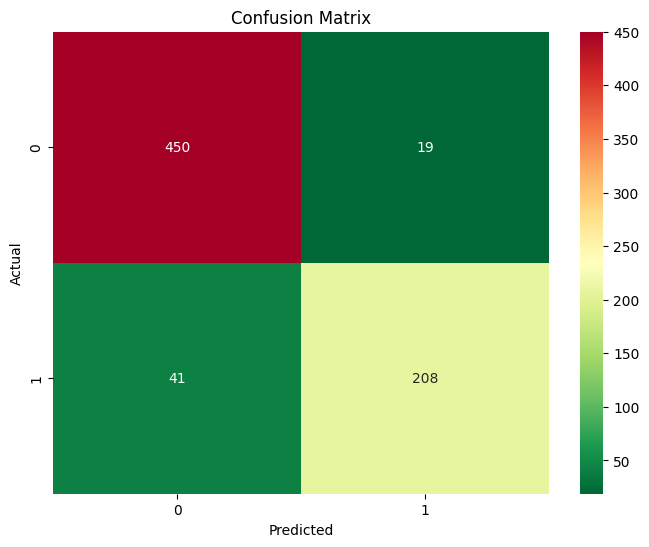

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap="RdYlGn_r")

plt.title('Confusion Matrix')
plt.show()


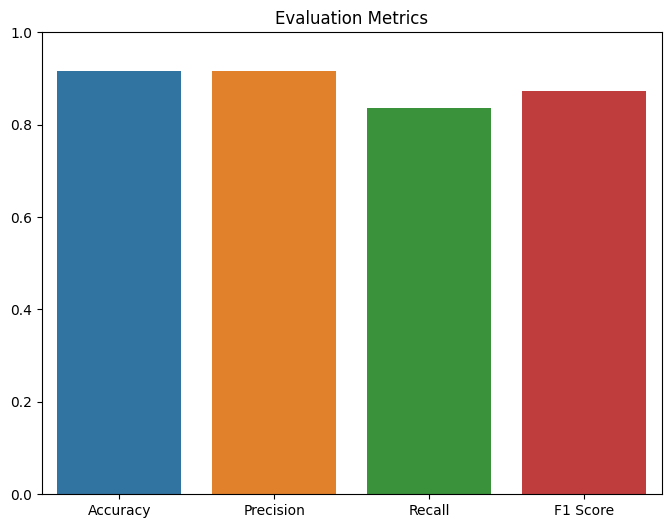

In [ ]:
# Create a bar plot for the evaluation metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 6))
sns.barplot(x=metrics, y=values)
plt.ylim([0, 1])
plt.title('Evaluation Metrics')
plt.show()